# Wine Quality Prediction
### Author : Farbodkhm

In [387]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
warnings.filterwarnings("ignore")

## Importing Dataset

In [388]:
df = pd.read_csv('Passanger_booking_data.csv')

## EDA

In [389]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [391]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_passengers,50002.0,1.591256,1.020167,1.00,1.00,1.00,2.00,9.0
purchase_lead,50002.0,84.940582,90.450548,0.00,21.00,51.00,115.00,867.0
length_of_stay,50002.0,23.044778,33.887171,0.00,5.00,17.00,28.00,778.0
flight_hour,50002.0,9.066277,5.412569,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50002.0,0.668773,0.470659,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50002.0,0.296968,0.456927,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50002.0,0.427143,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50002.0,7.277524,1.496854,4.67,5.62,7.57,8.83,9.5
booking_complete,50002.0,0.149574,0.356657,0.00,0.00,0.00,0.00,1.0


In [392]:
df.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [393]:
df.sales_channel.unique()

array(['Internet', 'Mobile'], dtype=object)

In [394]:
df.booking_origin.value_counts()

Australia               17873
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Tanzania                    1
Jordan                      1
Lebanon                     1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [395]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

**_Looks like everything's fine!_**

### Visualizing

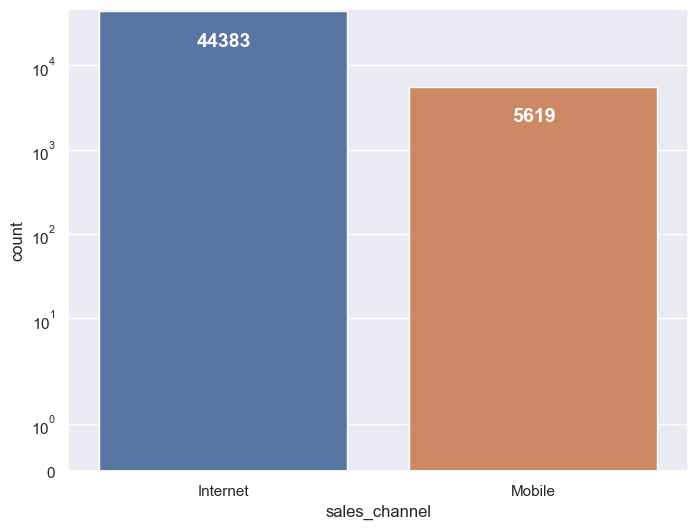

In [396]:
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.countplot(x='sales_channel', data=df)
ax.set(yscale='symlog')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height():.0f}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=14, weight='bold')

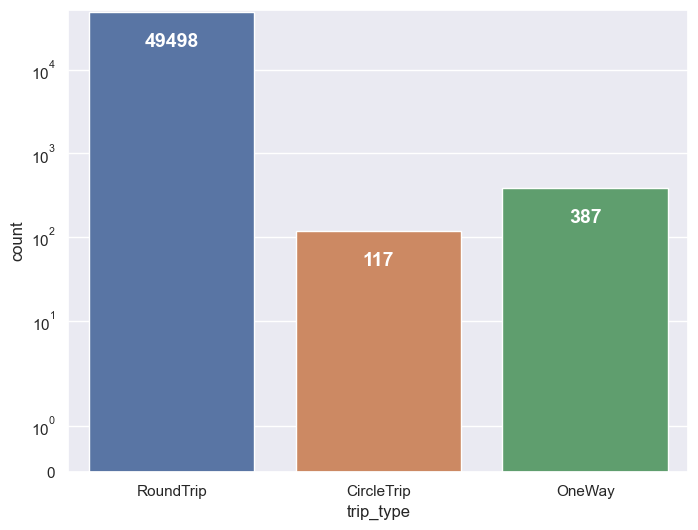

In [397]:
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.countplot(x='trip_type', data=df)
ax.set(yscale='symlog')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height():.0f}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=14, weight='bold')

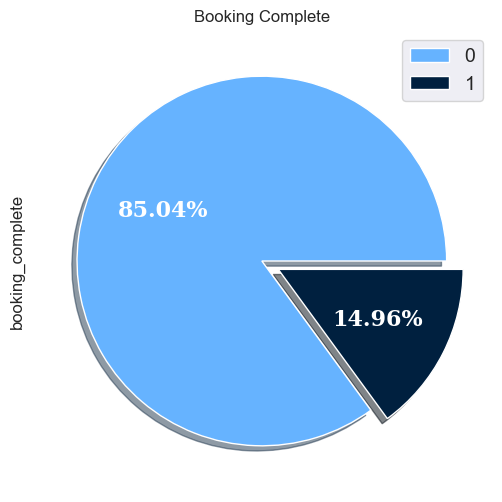

In [398]:
plt.title('Booking Complete')
df['booking_complete'].value_counts().plot(kind='pie', autopct='%.2f%%', explode = [0, 0.1], shadow=True, colors=['#66b3ff', '#00203FFF'], startangle=0, textprops={'color':"w", 'size':16, 'family': 'serif', 'weight':'bold'})
plt.legend(fontsize=14)
plt.show()

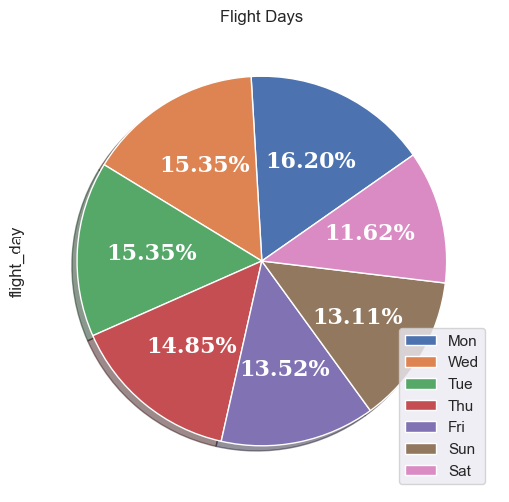

In [399]:
plt.title('Flight Days')
df['flight_day'].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True, startangle=35, textprops={'color':"w", 'size':16, 'family': 'serif', 'weight':'bold'})
plt.legend()
plt.show()

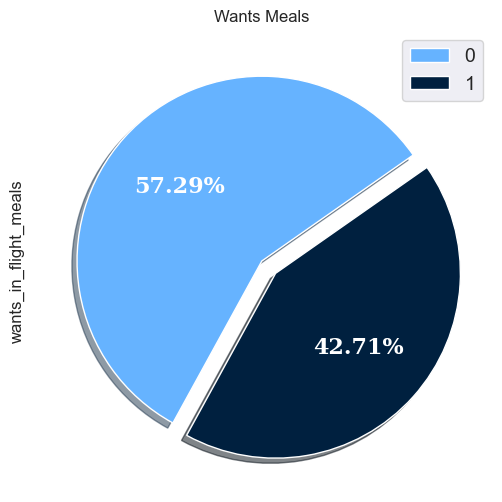

In [400]:
plt.title('Wants Meals')
df['wants_in_flight_meals'].value_counts().plot(kind='pie', autopct='%.2f%%', explode = [0, 0.1], shadow=True, colors=['#66b3ff', '#00203FFF'], startangle=35, textprops={'color':"w", 'size':16, 'family': 'serif', 'weight':'bold'})
plt.legend(fontsize=14)
plt.show()

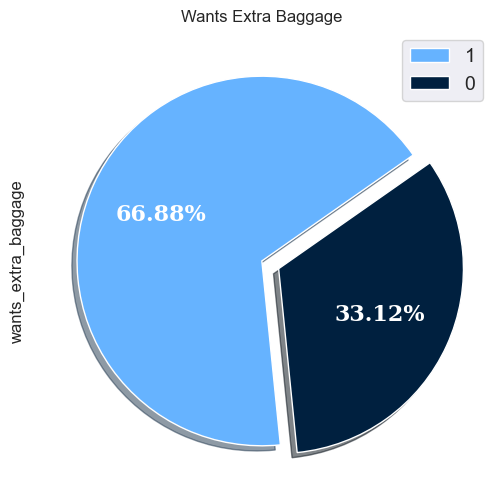

In [401]:
plt.title('Wants Extra Baggage')
df['wants_extra_baggage'].value_counts().plot(kind='pie', autopct='%.2f%%', explode = [0, 0.1], shadow=True, colors=['#66b3ff', '#00203FFF'], startangle=35, textprops={'color':"w", 'size':16, 'family': 'serif', 'weight':'bold'})
plt.legend(fontsize=14)
plt.show()

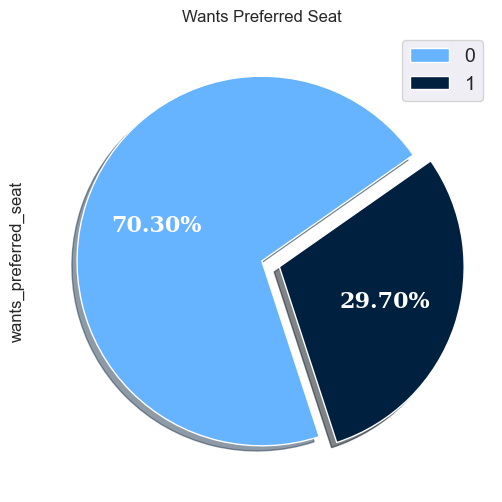

In [402]:
plt.title('Wants Preferred Seat')
df['wants_preferred_seat'].value_counts().plot(kind='pie', autopct='%.2f%%', explode = [0, 0.1], shadow=True, colors=['#66b3ff', '#00203FFF'], startangle=35, textprops={'color':"w", 'size':16, 'family': 'serif', 'weight':'bold'})
plt.legend(fontsize=14)
plt.show()

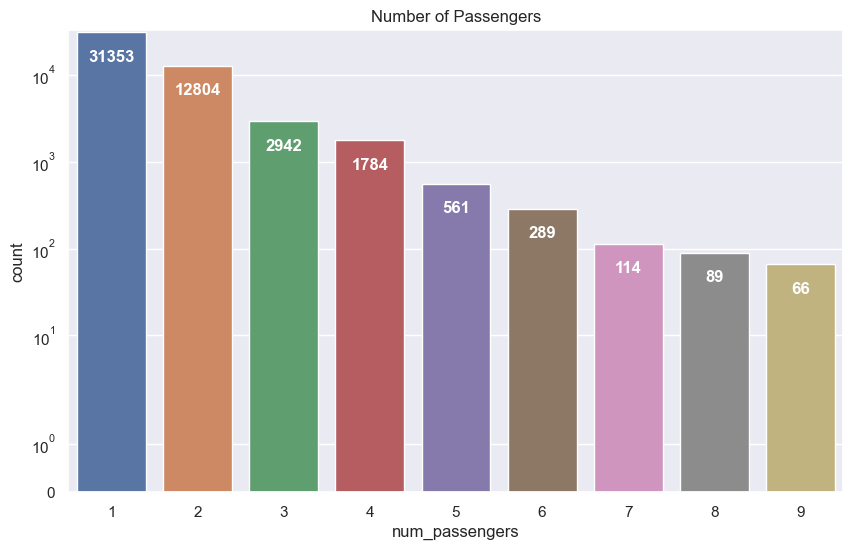

In [403]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.countplot(x='num_passengers', data=df)
ax.set(yscale='symlog')
ax.set_title('Number of Passengers')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height():.0f}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=12, weight='bold')

## Data Preprocessing

In [404]:
df.drop(columns=['route', 'booking_origin'], inplace=True)

In [405]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,0,0,1,5.52,0


In [406]:
salesChannelEncoder = {
    'Internet' : 0,
    'Mobile' : 1
}

df.sales_channel.replace(salesChannelEncoder, inplace=True)

In [407]:
flightDayEncoder = {
    'Sat' : 0,
    'Sun' : 1,
    'Fri' : 2,
    'Thu' : 3,
    'Tue' : 4,
    'Wed' : 5,
    'Mon' : 6
}

df.flight_day.replace(flightDayEncoder, inplace=True)

In [408]:
tripTypeEncoder = {
    'CircleTrip' : 0,
    'OneWay' : 1,
    'RoundTrip' : 2
}

df.trip_type.replace(tripTypeEncoder, inplace=True)

In [409]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,0,2,21,12,6,4,0,0,0,7.21,1
1,2,0,2,262,19,7,0,1,0,0,5.52,0
2,1,0,2,112,20,3,0,0,0,0,5.52,0
3,2,0,2,243,22,17,5,1,1,0,5.52,0
4,1,0,2,96,31,4,0,0,0,1,5.52,0


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  int64  
 2   trip_type              50002 non-null  int64  
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  int64  
 7   wants_extra_baggage    50002 non-null  int64  
 8   wants_preferred_seat   50002 non-null  int64  
 9   wants_in_flight_meals  50002 non-null  int64  
 10  flight_duration        50002 non-null  float64
 11  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 4.6 MB


In [411]:
x = df.drop(columns='booking_complete')
y = df['booking_complete'].values.reshape(-1, 1)
x

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,1,0,2,21,12,6,4,0,0,0,7.21
1,2,0,2,262,19,7,0,1,0,0,5.52
2,1,0,2,112,20,3,0,0,0,0,5.52
3,2,0,2,243,22,17,5,1,1,0,5.52
4,1,0,2,96,31,4,0,0,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...
49997,2,0,2,27,6,9,0,1,0,1,5.62
49998,1,0,2,111,6,4,1,0,0,0,5.62
49999,1,0,2,24,6,22,0,0,0,1,5.62
50000,1,0,2,15,6,11,6,1,0,1,5.62


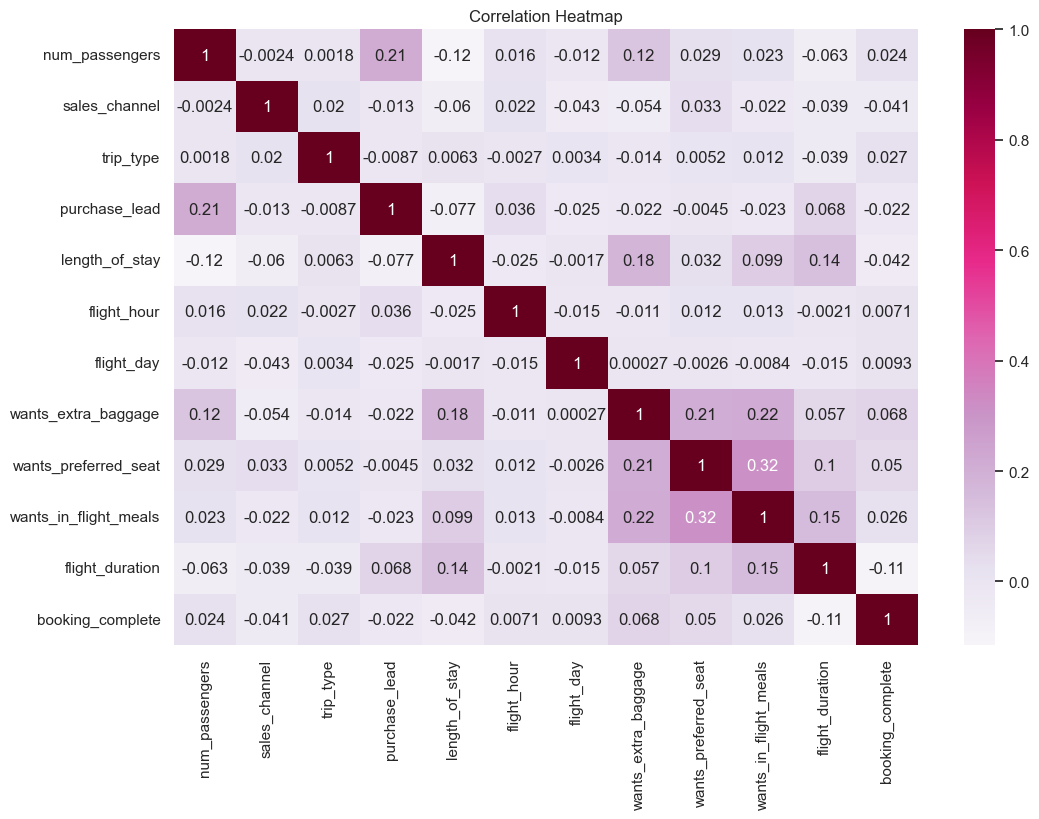

In [412]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="PuRd")
plt.title("Correlation Heatmap")
plt.show()

### Split Train & Test

In [413]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Feature Scaling

In [414]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

## Training Models

Accuracy is: 0.8129187081291871


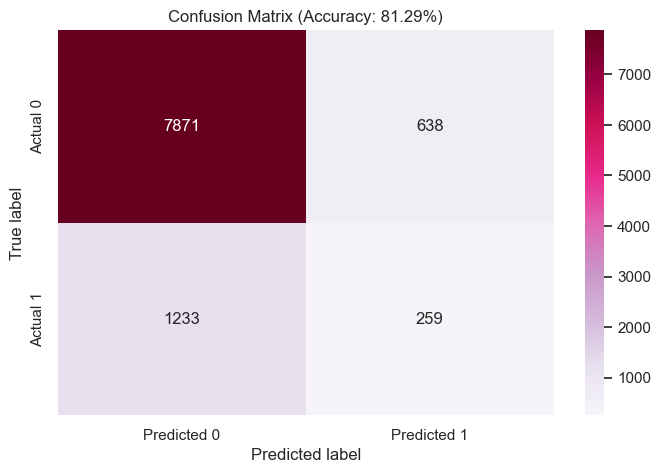

In [415]:
classifier = XGBClassifier(tree_method='gpu_hist', n_estimators=3000)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy is:', accuracy_score(y_test, y_pred))
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d',
            cmap='PuRd', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix (Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%)')
plt.show()

In [416]:
feature_importance=pd.DataFrame({'Feature':x.columns,'Importance':classifier.feature_importances_}).sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
7,wants_extra_baggage,0.122641
1,sales_channel,0.112017
10,flight_duration,0.102861
4,length_of_stay,0.092142
8,wants_preferred_seat,0.091970
5,flight_hour,0.084815
6,flight_day,0.084757
9,wants_in_flight_meals,0.082664
0,num_passengers,0.079235
3,purchase_lead,0.073617


Accuracy is: 0.8067193280671933


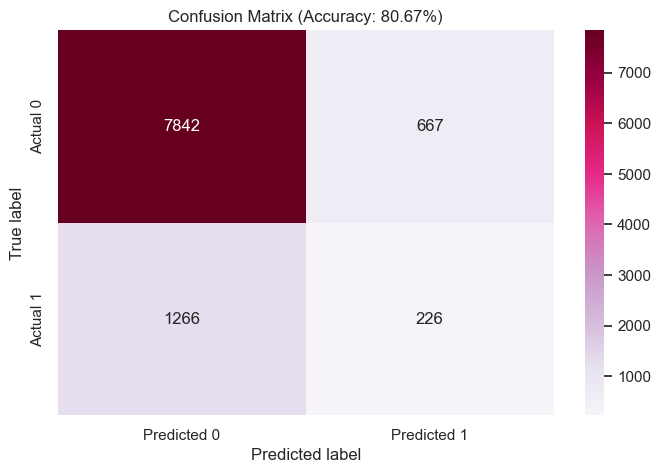

In [417]:
classifier = RandomForestClassifier(n_estimators=3, random_state = 0, criterion='gini')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy is:', accuracy_score(y_test, y_pred))
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d',cmap='PuRd', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix (Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%)')
plt.show()

Accuracy is: 0.8508149185081492
Accuracy: 85.03 %
Standard Deviation: 0.01 %


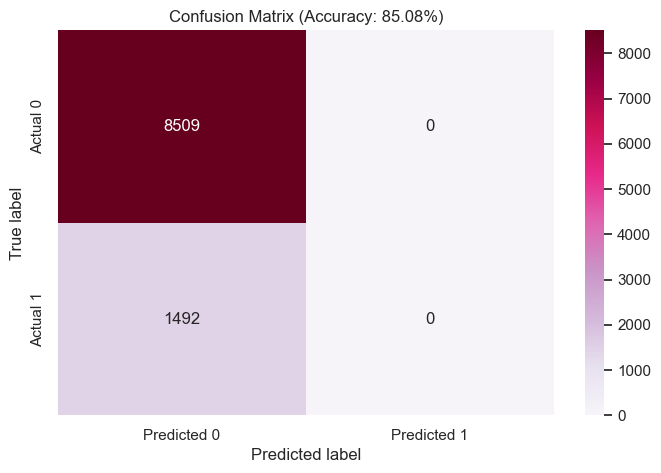

In [418]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy is:', accuracy_score(y_test, y_pred))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d',
            cmap='PuRd', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix (Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%)')
plt.show()

Accuracy is: 0.8508149185081492
Accuracy: 85.00 %
Standard Deviation: 0.05 %


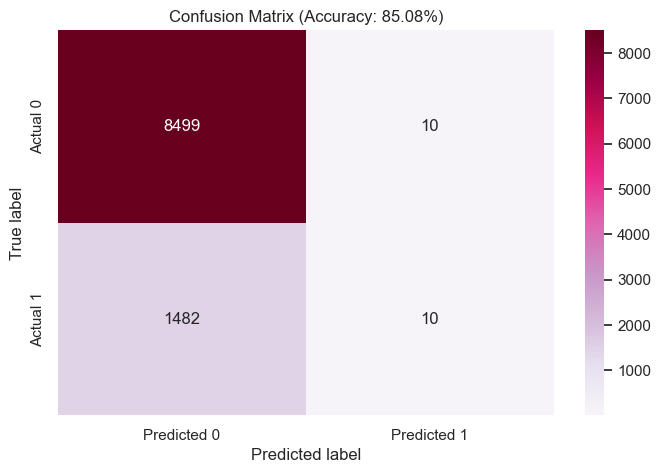

In [419]:
classifier = LGBMClassifier(random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy is:', accuracy_score(y_test, y_pred))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d',
            cmap='PuRd', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix (Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%)')
plt.show()

Accuracy is: 0.8503149685031497
Accuracy: 85.03 %
Standard Deviation: 0.04 %


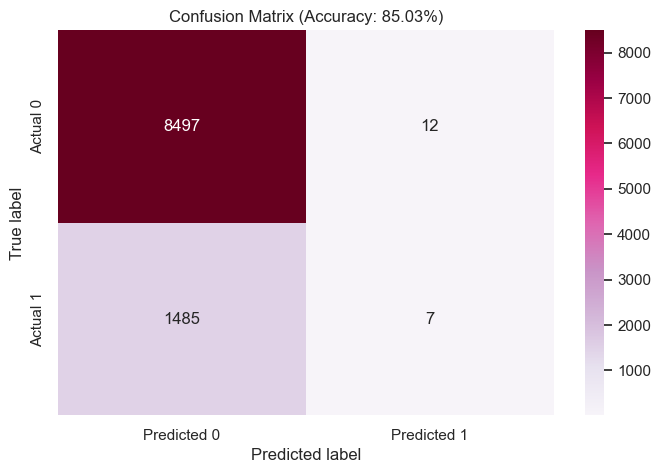

In [420]:
classifier = HistGradientBoostingClassifier(random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy is:', accuracy_score(y_test, y_pred))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d',
            cmap='PuRd', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix (Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%)')
plt.show()

Accuracy is: 0.807919208079192
Accuracy: 80.61 %
Standard Deviation: 0.40 %


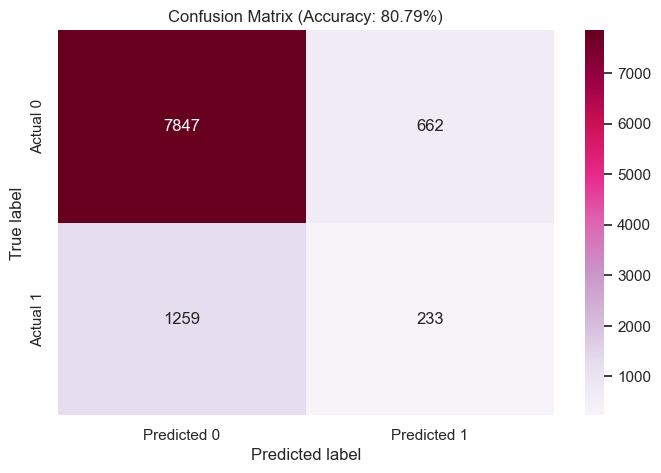

In [421]:
classifier = KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance', algorithm='brute', metric='braycurtis')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy is:', accuracy_score(y_test, y_pred))
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d',
            cmap='PuRd', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix (Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%)')
plt.show()